In [73]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [74]:
stocks = ['TSLA', 'GOOG', 'BA', 'DPZ']


START_DATE = dt.datetime(1970,1,1)
END_DATE = dt.datetime.today()

df = pd.DataFrame()

for stock in stocks:
    df[stock] = web.DataReader(stock, 'yahoo', START_DATE, END_DATE)['Adj Close']

df

,TSLA,GOOG,BA,DPZ
Date,,,,
2010-06-29,4.778000,226.281845,49.364201,9.344164
2010-06-30,4.766000,221.644226,49.137108,9.607740
2010-07-01,4.392000,218.924423,48.753410,9.616241
2010-07-02,3.840000,217.459900,48.502819,9.777788
2010-07-06,3.222000,217.220810,48.048664,9.488706
...,...,...,...,...
2020-12-29,665.989990,1758.719971,216.250000,384.359985
2020-12-30,694.780029,1739.520020,216.669998,384.619995
2020-12-31,705.669983,1751.880005,214.059998,383.459991


In [75]:
daily_returns = df.pct_change()
daily_returns

,TSLA,GOOG,BA,DPZ
Date,,,,
2010-06-29,NaN,NaN,NaN,NaN
2010-06-30,-0.002512,-0.020495,-0.004600,0.028208
2010-07-01,-0.078472,-0.012271,-0.007809,0.000885
2010-07-02,-0.125683,-0.006690,-0.005140,0.016799
2010-07-06,-0.160938,-0.001099,-0.009363,-0.029565
...,...,...,...,...
2020-12-29,0.003465,-0.009780,0.000740,-0.039532
2020-12-30,0.043229,-0.010917,0.001942,0.000676
2020-12-31,0.015674,0.007105,-0.012046,-0.003016


In [76]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
daily_returns['EWP'] = daily_returns.dot(weights)
daily_returns

,TSLA,GOOG,BA,DPZ,EWP
Date,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN
2010-06-30,-0.002512,-0.020495,-0.004600,0.028208,0.000150
2010-07-01,-0.078472,-0.012271,-0.007809,0.000885,-0.024417
2010-07-02,-0.125683,-0.006690,-0.005140,0.016799,-0.030178
2010-07-06,-0.160938,-0.001099,-0.009363,-0.029565,-0.050241
...,...,...,...,...,...
2020-12-29,0.003465,-0.009780,0.000740,-0.039532,-0.011277
2020-12-30,0.043229,-0.010917,0.001942,0.000676,0.008733
2020-12-31,0.015674,0.007105,-0.012046,-0.003016,0.001929


In [77]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.fillna(1, inplace=True)
cumulative_returns

,TSLA,GOOG,BA,DPZ,EWP
Date,,,,,
2010-06-29,1.000000,1.000000,1.000000,1.000000,1.000000
2010-06-30,0.997488,0.979505,0.995400,1.028208,1.000150
2010-07-01,0.919213,0.967486,0.987627,1.029117,0.975730
2010-07-02,0.803684,0.961013,0.982550,1.046406,0.946284
2010-07-06,0.674341,0.959957,0.973350,1.015469,0.898741
...,...,...,...,...,...
2020-12-29,139.386774,7.772254,4.380705,41.133695,32.652071
2020-12-30,145.412316,7.687404,4.389213,41.161521,32.937210
2020-12-31,147.691503,7.742026,4.336341,41.037379,33.000757


<AxesSubplot:xlabel='Date'>

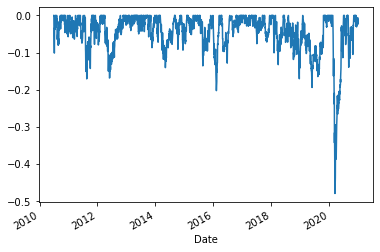

In [78]:
portfolio_cumulative_returns = cumulative_returns['EWP']

previous_peaks = portfolio_cumulative_returns.cummax()
drawdown = (portfolio_cumulative_returns - previous_peaks) / previous_peaks
drawdown.plot()

In [62]:
mdd = drawdown.min()
mdd

-0.47989660974223636

## Portfolio Return

$ \Huge R_{p} = \Sigma_{i=1}^{n} = w_{i} r_{i}$

In [28]:
# From daily returns of individual stocks to portfolio CAGR

daily_returns = df.pct_change()

cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.fillna(1,inplace=True)
cagr = cumulative_returns**(252/len(cumulative_returns.index)) - 1

portfolio_cagr = np.dot(cagr.iloc[-1,:],weights)
portfolio_cagr

0.34988474332868785

## Correlation

$ \Huge Corr (R_{i},R_{j}) = \frac{Cov (R_{i},R_{j})}{\sigma_{i} \sigma_{j}} $

## Portfolio Volatility (Two Assets)

$ \LARGE \sigma_{p} = \sqrt{w_{1}^{2}\sigma_{1}^{2} + w_{2}^{2}\sigma_{2}^{2} + 2w_{1}w_{2}Cov_{1,2}} $

In [29]:
# From daily returns to portfolio volatility

cov_matrix = daily_returns.cov() * 252

# Calculate the portfolio variance

portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
portfolio_vol

0.25227459765065596

In [30]:
# Sharpe Ratio

risk_free = 0.00

portfolio_sharpe = (portfolio_cagr - risk_free) / portfolio_vol
portfolio_sharpe

1.386920231315561

## Portfolio Optimization with PyPortfolioOpt 

In [31]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization
# Calculate the expected returns and the annualized sample covariance matrix

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
result = ef.portfolio_performance(verbose=True)

Expected annual return: 42.9%
Annual volatility: 26.2%
Sharpe Ratio: 1.56


In [32]:
data = {'Equally Weighted Portfolio': [(portfolio_cagr).round(2), (portfolio_vol).round(2), portfolio_sharpe.round(2)], 
        'Max Sharpe Portfolio': [(result[0]).round(2), (result[1]).round(2), result[2].round(2)]}

In [33]:
compare = pd.DataFrame(data, index=['CAGR','Volatility','Sharpe Ratio'])
compare

,Equally Weighted Portfolio,Max Sharpe Portfolio
CAGR,0.35,0.43
Volatility,0.25,0.26
Sharpe Ratio,1.39,1.56


In [34]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=30000)

allocation, leftover = da.lp_portfolio()

print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'TSLA': 10.0, 'GOOG': 2.0, 'BA': 1.0, 'DPZ': 49.0}
Funds remaining: $299.35


In [ ]:


from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import expected_returns
from pypfopt import risk_models

import pandas_datareader.data as web
import datetime as dt

from pypfopt import plotting
from pypfopt import cla

import data.fmp

# Retrieve Price Data of Individual Stocks

symbols = ['FB', 'JNJ', 'DIS', 'T', 'O', 'PG']

START_DATE = dt.datetime(1970, 1, 1)
END_DATE = dt.datetime.today()

df = web.DataReader(symbols, 'yahoo', START_DATE, END_DATE)['Adj Close']
df.dropna(inplace=True)
df.head(10)

# Compute Mean and Covariance

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

mu

plotting.plot_covariance(S)

# Max Sharpe Portfolio

maxSharpe = EfficientFrontier(mu, S)

maxSharpe.max_sharpe()

maxSharpe_weights = maxSharpe.clean_weights()

print(maxSharpe_weights)

plotting.plot_weights(maxSharpe_weights)

maxSharpe_result = maxSharpe.portfolio_performance(verbose=True)

# Min Volatility Portfolio

minVol = EfficientFrontier(mu,S)

minVol.min_volatility()

minVol_weights = minVol.clean_weights()

print(minVol_weights)

plotting.plot_weights(minVol_weights)

minVol_result = minVol.portfolio_performance(verbose=True)

# Max Quadratic Utility Portfolio

maxQuadraticUtility = EfficientFrontier(mu,S)

maxQuadraticUtility.max_quadratic_utility()

maxQuadraticUtility_weights = maxQuadraticUtility.clean_weights()

print(maxQuadraticUtility_weights)

plotting.plot_weights(maxQuadraticUtility_weights)

maxQuadraticUtility_result = maxQuadraticUtility.portfolio_performance(verbose=True)

#-------------------------------------------------
# OPTIMIZED PORTFOLIO IN CLA OBJECT FOR PLOTTING
#-------------------------------------------------

# Efficient Frontier for Maximum Sharpe Portfolio
maxSharpeCLA = cla.CLA(mu,S)
maxSharpeCLA.max_sharpe()
plotting.plot_efficient_frontier(maxSharpeCLA, show_assets=True)



# Efficient Frontier for Minimum Volatility Portfolio
minVolCLA = cla.CLA(mu,S)
minVolCLA.min_volatility()
plotting.plot_efficient_frontier(minVolCLA, show_assets=True)



#-------------------------------------------------
# PERFORMANCE COMPARISON
#-------------------------------------------------

import pandas as pd

performance = pd.DataFrame(columns=['Portfolio', 'Expected Return', 'Annual Volatility', 'Sharpe Ratio'])

data = {'Portfolio': 'Max Sharpe', 
        'Expected Return': maxSharpe_result[0], 
        'Annual Volatility': maxSharpe_result[1], 
        'Sharpe Ratio': maxSharpe_result[2]}

performance = performance.append(data, ignore_index=True)

data = {'Portfolio': 'Min Volatility', 
        'Expected Return': minVol_result[0], 
        'Annual Volatility': minVol_result[1], 
        'Sharpe Ratio': minVol_result[2]}

performance = performance.append(data, ignore_index=True)

data = {'Portfolio': 'Max Quadratic Utility', 
        'Expected Return': maxQuadraticUtility_result[0], 
        'Annual Volatility': maxQuadraticUtility_result[1], 
        'Sharpe Ratio': maxQuadraticUtility_result[2]}

performance = performance.append(data, ignore_index=True)

performance.set_index('Portfolio')

